In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


With Plotly express, show a 3D scatterplot with :

X-axis : MAX temperature
Y-axis : MIN temperature
Z-axis : Sunhours

In [3]:
fig = px.scatter_3d(df_weather, 
                    x="MAX_TEMPERATURE_C", 
                    y="MIN_TEMPERATURE_C", 
                    z="SUNHOUR",
                    color="MONTH")
fig.show()

You have to predict the MAX temperature from 2 variables :

MIN temperature
Sunhours
Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

Remember to save the result of your prediction in a new column 'predict'.

In [4]:
from sklearn.linear_model import LinearRegression
X = df_weather[["MIN_TEMPERATURE_C", "SUNHOUR"]]
y = df_weather["MAX_TEMPERATURE_C"]
model = LinearRegression()
model.fit(X, y)
df_weather["predict"] = model.predict(X)

With Plotly express, show a 3D scatterplot with :

X-axis : your new 'predict' column
Y-axis : MIN temperature
Z-axis : Sunhours

In [5]:
X = df_weather[["MIN_TEMPERATURE_C", "SUNHOUR"]]
y = df_weather["MAX_TEMPERATURE_C"]

model = LinearRegression()
model.fit(X, y)
df_weather["predict"] = model.predict(X)

fig = px.scatter_3d(x="predict", 
                    y="MIN_TEMPERATURE_C", 
                    z="SUNHOUR",
                    data_frame=df_weather)
fig.show()

Make a prediction with the maximum number of variables. But beware :

variables must be numeric
your target (MAX temperature) should not be present in variables
Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :

X-axis : Date
Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

In [6]:
# You can check columns name :

df_weather.info()
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,predict
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,116,143,176,0,1,5.1,very bad,1,1,8.980922
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,119,116,116,0,1,8.7,very bad,1,2,12.353602
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,116,116,116,0,1,8.7,very bad,1,3,7.410233
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,116,116,122,0,1,5.1,very bad,1,4,4.037552
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,143,116,116,0,1,8.7,very bad,1,5,6.421559


In [7]:
# you can automatically select all the numeric columns with a select_dtypes and drop the target column :
df_weather.select_dtypes(include = 'number').drop(columns='MAX_TEMPERATURE_C')

,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY,predict
0,4,10,4,7,8,0.2,94,9.000,1037,62.250,...,3,116,143,176,0,1,5.1,1,1,8.980922
1,5,18,7,7,5,0.0,90,9.000,1040,58.125,...,3,119,116,116,0,1,8.7,1,2,12.353602
2,0,18,0,4,3,0.0,88,10.000,1040,37.000,...,-4,116,116,116,0,1,8.7,1,3,7.410233
3,-1,15,-1,4,3,0.0,91,10.000,1040,42.625,...,-4,116,116,122,0,1,5.1,1,4,4.037552
4,-1,8,-1,4,3,0.0,91,8.000,1040,17.250,...,-2,143,116,116,0,1,8.7,1,5,6.421559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,10,13,10,12,11,0.0,96,7.375,1033,57.625,...,8,119,143,116,0,1,8.7,12,27,17.296971
361,5,12,7,8,8,0.0,93,7.625,1035,39.500,...,4,143,116,116,0,1,6.9,12,28,11.161599
362,2,11,3,6,7,0.0,86,10.000,1034,4.000,...,0,116,116,116,0,1,8.7,12,29,9.387580
363,4,7,5,9,9,0.0,61,10.000,1033,1.875,...,4,113,113,113,0,1,8.7,12,30,11.364928


In [8]:
# define variables and target :

X2 = df_weather.select_dtypes(include = 'number').drop(columns='MAX_TEMPERATURE_C')
y2 = df_weather['MAX_TEMPERATURE_C']

# train the model :

model2 = LinearRegression().fit(X2, y2)

In [9]:
# ajout de la colonne avec les predictions :
df_weather['predict2'] = model2.predict(X2)

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

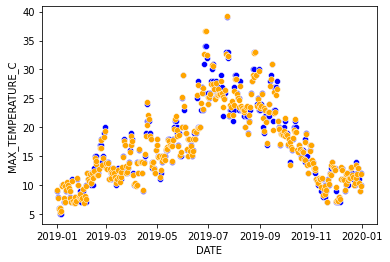

In [10]:
# convert DATE column into datetime format so it can be used in our graph
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# creation of two scatterplot one with real Max Temperature C and one with our prediction
sns.scatterplot(data = df_weather,
                x = 'DATE',
                y = 'MAX_TEMPERATURE_C',
                color = 'blue')

sns.scatterplot(data = df_weather,
                x = 'DATE',
                y = 'predict2',
                color = 'orange')

plt.show()

In [11]:
# you can look at the max coefficient directly by reading all the results :

for i, j in zip (X2.columns, model2.coef_):
    print(i, j)

MIN_TEMPERATURE_C 0.04126922649669982
WINDSPEED_MAX_KMH -0.002823928363796857
TEMPERATURE_MORNING_C -0.08779579916589177
TEMPERATURE_NOON_C 0.1910416471108985
TEMPERATURE_EVENING_C 0.17694033106464768
PRECIP_TOTAL_DAY_MM 0.0050483426120742254
HUMIDITY_MAX_PERCENT -0.0025288871778318617
VISIBILITY_AVG_KM 0.010042909338621304
PRESSURE_MAX_MB -0.000583380423385392
CLOUDCOVER_AVG_PERCENT -0.00579378634119097
HEATINDEX_MAX_C 0.5842807479084101
DEWPOINT_MAX_C -0.03418089114194262
WINDTEMP_MAX_C 0.05221594780580943
WEATHER_CODE_MORNING 0.0005299146586763335
WEATHER_CODE_NOON 9.325673998730117e-05
WEATHER_CODE_EVENING -0.0002117767820533973
TOTAL_SNOW_MM 2.7755575615628914e-17
UV_INDEX -0.028296466633455804
SUNHOUR -0.03080504773616117
MONTH 0.010717391001480106
DAY -0.0013309235416139181
predict 0.02040196156916172


In [12]:
# or you you can look for the max coeff by creating a list of tuples with
# name of the column and its coeff

list_name_coeff = list(zip(X2.columns, model2.coef_))
list_name_coeff

[('MIN_TEMPERATURE_C', 0.04126922649669982),
 ('WINDSPEED_MAX_KMH', -0.002823928363796857),
 ('TEMPERATURE_MORNING_C', -0.08779579916589177),
 ('TEMPERATURE_NOON_C', 0.1910416471108985),
 ('TEMPERATURE_EVENING_C', 0.17694033106464768),
 ('PRECIP_TOTAL_DAY_MM', 0.0050483426120742254),
 ('HUMIDITY_MAX_PERCENT', -0.0025288871778318617),
 ('VISIBILITY_AVG_KM', 0.010042909338621304),
 ('PRESSURE_MAX_MB', -0.000583380423385392),
 ('CLOUDCOVER_AVG_PERCENT', -0.00579378634119097),
 ('HEATINDEX_MAX_C', 0.5842807479084101),
 ('DEWPOINT_MAX_C', -0.03418089114194262),
 ('WINDTEMP_MAX_C', 0.05221594780580943),
 ('WEATHER_CODE_MORNING', 0.0005299146586763335),
 ('WEATHER_CODE_NOON', 9.325673998730117e-05),
 ('WEATHER_CODE_EVENING', -0.0002117767820533973),
 ('TOTAL_SNOW_MM', 2.7755575615628914e-17),
 ('UV_INDEX', -0.028296466633455804),
 ('SUNHOUR', -0.03080504773616117),
 ('MONTH', 0.010717391001480106),
 ('DAY', -0.0013309235416139181),
 ('predict', 0.02040196156916172)]

In [13]:
# passing the list into a dataframe

# sort it by coef value and by descending order and show only its first row
df_name_coeff = pd.DataFrame(list_name_coeff, columns = ['X2.columns', 'model2.coef_'])
df_name_coeff.sort_values(by = 'model2.coef_', ascending = False, inplace=True)
df_name_coeff

,X2.columns,model2.coef_
10,HEATINDEX_MAX_C,5.842807e-01
3,TEMPERATURE_NOON_C,1.910416e-01
4,TEMPERATURE_EVENING_C,1.769403e-01
12,WINDTEMP_MAX_C,5.221595e-02
0,MIN_TEMPERATURE_C,4.126923e-02
21,predict,2.040196e-02
19,MONTH,1.071739e-02
7,VISIBILITY_AVG_KM,1.004291e-02
5,PRECIP_TOTAL_DAY_MM,5.048343e-03
13,WEATHER_CODE_MORNING,5.299147e-04


In [14]:
df_name_coeff.head(1)

,X2.columns,model2.coef_
10,HEATINDEX_MAX_C,0.584281


In [15]:
# or use idxmax to find the index number where the maximum value in column model2.coef_ is (idxmax)
# and looking for this row in the dataframe df_name_coeff (iloc)

max_coeff = df_name_coeff.loc[df_name_coeff['model2.coef_'].idxmax()].values
max_coeff

array(['HEATINDEX_MAX_C', 0.5842807479084101], dtype=object)

In [16]:
print(f'Maximum coefficient is {round(max_coeff[1], 2)}, for column {max_coeff[0]}')

Maximum coefficient is 0.58, for column HEATINDEX_MAX_C
